### **Import necessary modules**

In [25]:
import pandas as pd  # Data preprocessing 
import pandas_datareader as pdr # Data Source 
import numpy as np # Linear Algebra 
import matplotlib.pyplot as plt # Data Visualization
from statsmodels.tsa.seasonal import seasonal_decompose # decomposition of time series (seasonality, trend etc.)

### **Reading the dataset and wrangling**

In [26]:
df = pdr.DataReader('AAPL','yahoo', start = '2020-01-01', end = '2021-12-31')
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.683571
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,72.967216
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.548637
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.202736
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.380287
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,75.960190
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.131912
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,77.758415
2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400.0,76.708427


### **Time to have a glance to our dataset**

In [27]:
print('The summary information of dataset:')
df.info()
print('_'*75)
print('Summary Statistics:')
df.describe()

The summary information of dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       505 non-null    float64
 1   Low        505 non-null    float64
 2   Open       505 non-null    float64
 3   Close      505 non-null    float64
 4   Volume     505 non-null    float64
 5   Adj Close  505 non-null    float64
dtypes: float64(6)
memory usage: 27.6 KB
___________________________________________________________________________
Summary Statistics:


,High,Low,Open,Close,Volume,Adj Close
count,505.000000,505.000000,505.000000,505.000000,5.050000e+02,505.000000
mean,119.459560,116.648331,118.019624,118.123030,1.241110e+08,117.006967
std,29.586384,29.270541,29.455228,29.439688,6.315499e+07,29.563856
min,57.125000,53.152500,57.020000,56.092499,4.100000e+07,55.174358
25%,92.970001,90.910004,91.279999,91.632500,8.086110e+07,90.376610
50%,125.180000,122.209999,123.750000,123.750000,1.088292e+08,122.667809
75%,142.210007,138.369995,140.070007,141.110001,1.477512e+08,140.323700
max,182.130005,178.529999,181.119995,180.330002,4.265100e+08,179.586868


It is essential to check datatype of all variables, so let's check dtype of index as well 

In [28]:
df.index.inferred_type == 'datetime64'

True

Since we have observed date column contains datetime variables, we don't need further data wrangling procedure and we can re-index this column

### **Duplicate values**

In [29]:
df.index.nunique()

505

In [30]:
# Duplicated rows
df.duplicated().value_counts()

False    505
dtype: int64

### **Reset the index**

In [31]:
df = df.reset_index(drop= False, inplace= False)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.683571
1,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,72.967216
2,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.548637
3,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.202736
4,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.380287


### **Data Visualization**

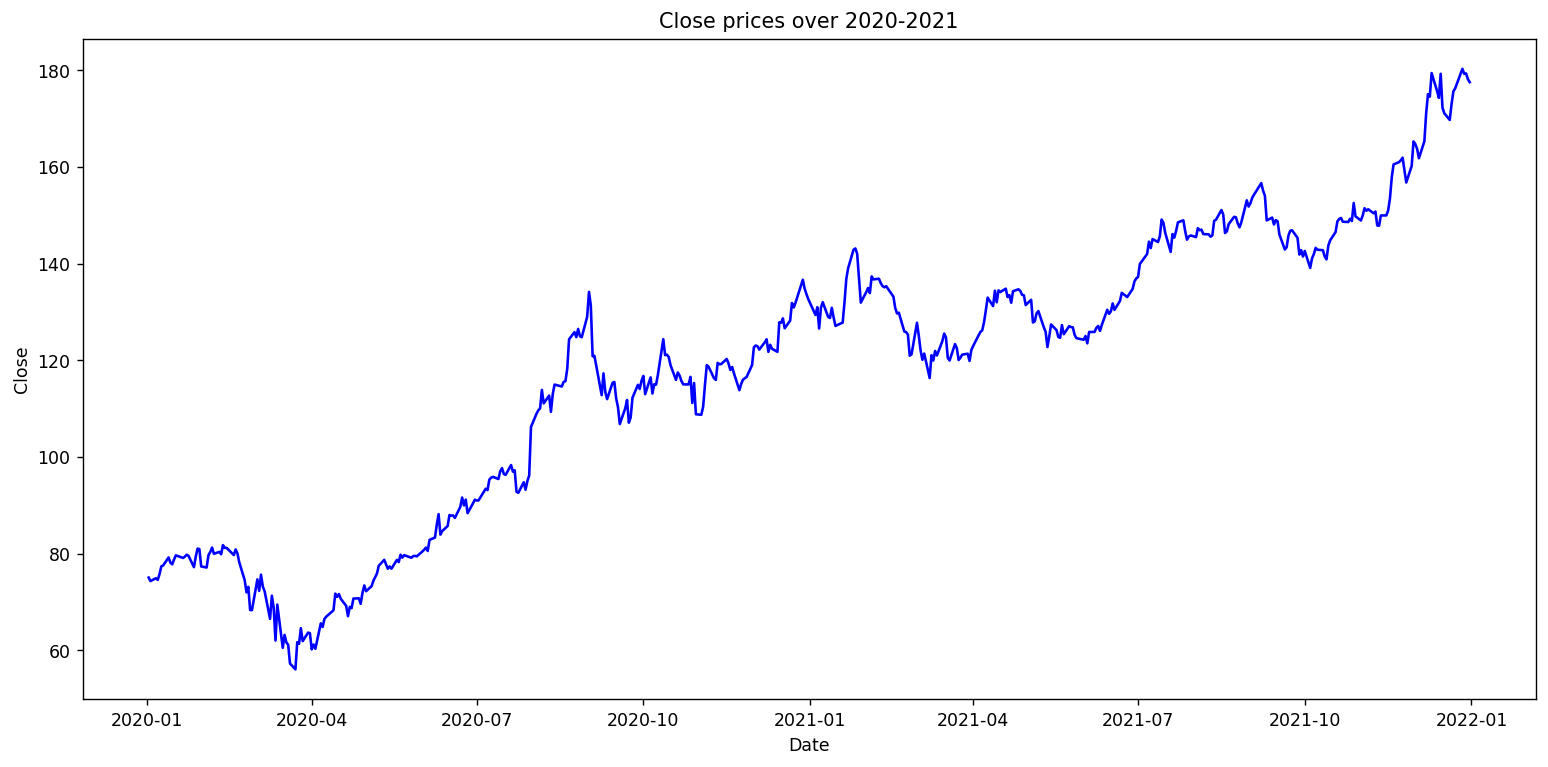

In [32]:
def df_plot(df, x, y, title='', xlabel= 'Date', ylabel = 'Close', dpi = 125):

    plt.figure(figsize= (15, 7), dpi= dpi)
    plt.plot(x, y, color = 'blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)

    plt.show()

df_plot(df, x= df['Date'], y= df['Close'], title= 'Close prices over 2020-2021')


###  **Candle Sticks**

* It could be really practical to examine daily open/close prices and highest/lowest prices in stock markets via  
Candle Sticks,thus the module "plotly" is helpful for creating candle stick charts. 

In [33]:
import plotly.graph_objects as go # Candle stick visualization 

In [34]:
# Creating candle sticks 
fig = go.Figure(data=[go.Candlestick(x= df['Date'], open = df['Open'],
                                     high= df['High'], low= df['Low'],
                                     close = df['Close'])])

# Add title and format axes
fig.update_layout(title='Daily Apple Stock Market Prices between 2020 and 2021',
                  yaxis_title='AAPL (USD)')

fig.show()

### **Components of time series analysis**

* Trend:  
* Seasonality  
* Cyclic variations   
* Irregular movement   

### **Decomposition of time series**

* A crucial technique to observe time series by decomposing into different components, each component  
has an underlying pattern category such as trend, seasonality, irregular movements 

In [35]:
# multiplicative decomposition
multiplicative_decomposition = seasonal_decompose(df['Close'], model= 'multiplicative', period= 12)

# additive decomposition
additive_decomposition = seasonal_decompose(df['Close'], model= 'additive', period= 12)

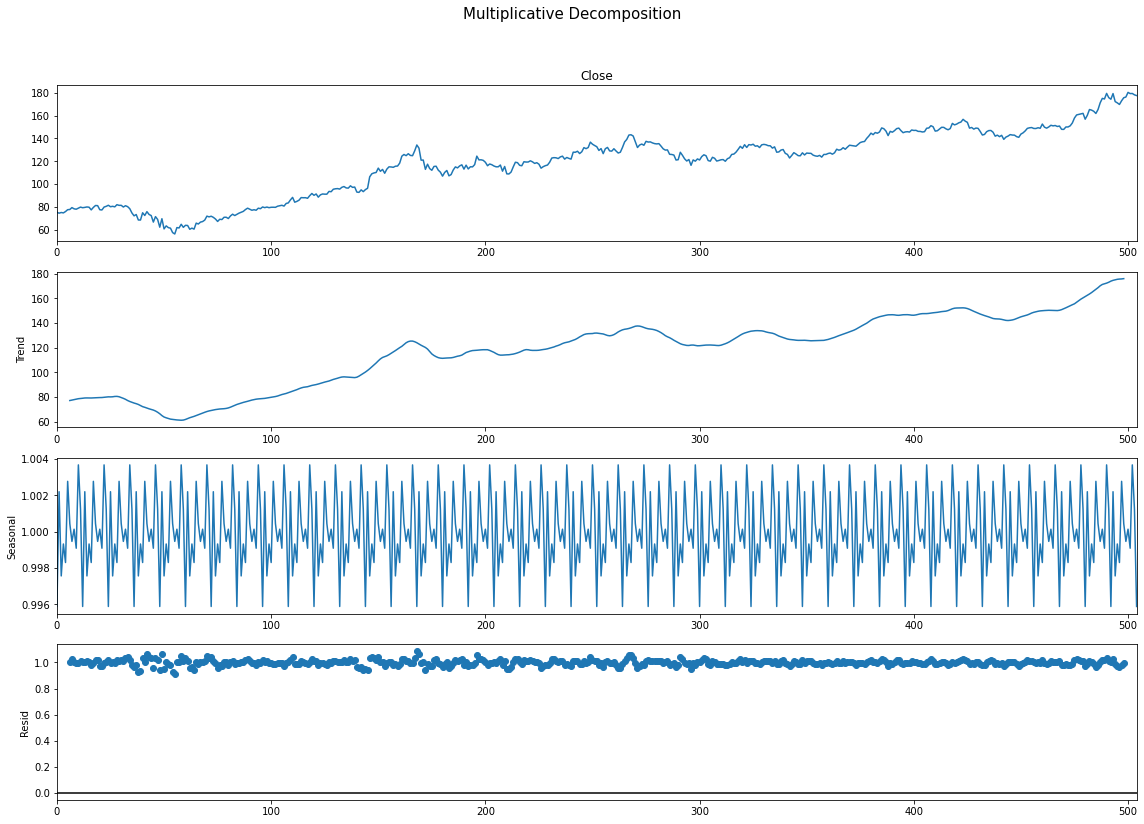

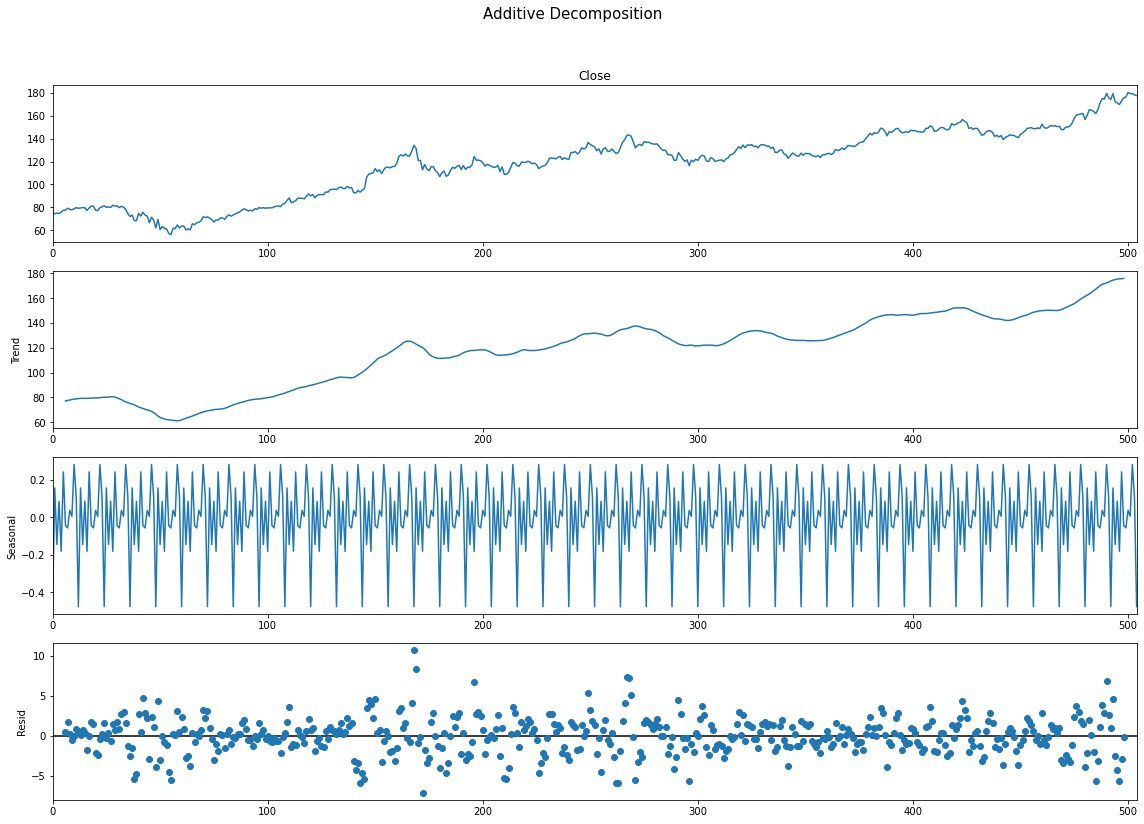

In [36]:
# plots
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize= 15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize= 15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()